In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../simulation/simdata/normal_operation_nitration_dynamic2.csv',header=0)
df

,Time_min,Temperature_K,Temperature_Measured_K,Temperature_Setpoint_K,Pressure_bar,Benzene_Concentration_mol_m3,NitricAcid_Concentration_mol_m3,Volume_m3,Agitator_Speed_rpm,Coolant_Flow_m3_s,Coolant_In_Temp_K,Coolant_Out_Temp_K,Feed_Flow_m3_s
0,0.0,313.150000,313.241738,313.150000,1.200000,1.121495e+04,0.000000,8.916667,800,0.000000,298.15,298.150000,0.000000
1,0.1,313.019138,313.044160,313.183333,1.189531,1.119527e+04,11.649974,8.932314,800,0.056373,298.15,298.637768,0.002608
2,0.2,313.074227,313.005005,313.216667,1.193938,1.117449e+04,21.560505,8.947695,800,0.000000,298.15,313.019138,0.002564
3,0.3,313.242545,313.313741,313.250000,1.207404,1.115237e+04,30.219751,8.963177,800,0.000000,298.15,313.074227,0.002580
4,0.4,313.465309,313.494156,313.283333,1.225225,1.112926e+04,37.591130,8.978561,800,0.020403,298.15,299.474678,0.002564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,299.6,319.695194,319.825174,353.150000,1.500000,3.288801e-79,1712.392727,27.634465,800,0.003491,298.15,307.189097,0.000000
2997,299.7,319.691430,319.806307,353.150000,1.500000,3.161528e-79,1712.426591,27.634655,800,0.000607,298.15,318.689070,0.000032
2998,299.8,319.691076,319.632980,353.150000,1.500000,3.039209e-79,1712.482255,27.634967,800,0.000000,298.15,319.691430,0.000052
2999,299.9,319.690959,319.672827,353.150000,1.500000,2.921646e-79,1712.500680,27.635071,800,0.000000,298.15,319.691076,0.000017


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time_min                         3001 non-null   float64
 1   Temperature_K                    3001 non-null   float64
 2   Temperature_Measured_K           3001 non-null   float64
 3   Temperature_Setpoint_K           3001 non-null   float64
 4   Pressure_bar                     3001 non-null   float64
 5   Benzene_Concentration_mol_m3     3001 non-null   float64
 6   NitricAcid_Concentration_mol_m3  3001 non-null   float64
 7   Volume_m3                        3001 non-null   float64
 8   Agitator_Speed_rpm               3001 non-null   int64  
 9   Coolant_Flow_m3_s                3001 non-null   float64
 10  Coolant_In_Temp_K                3001 non-null   float64
 11  Coolant_Out_Temp_K               3001 non-null   float64
 12  Feed_Flow_m3_s      

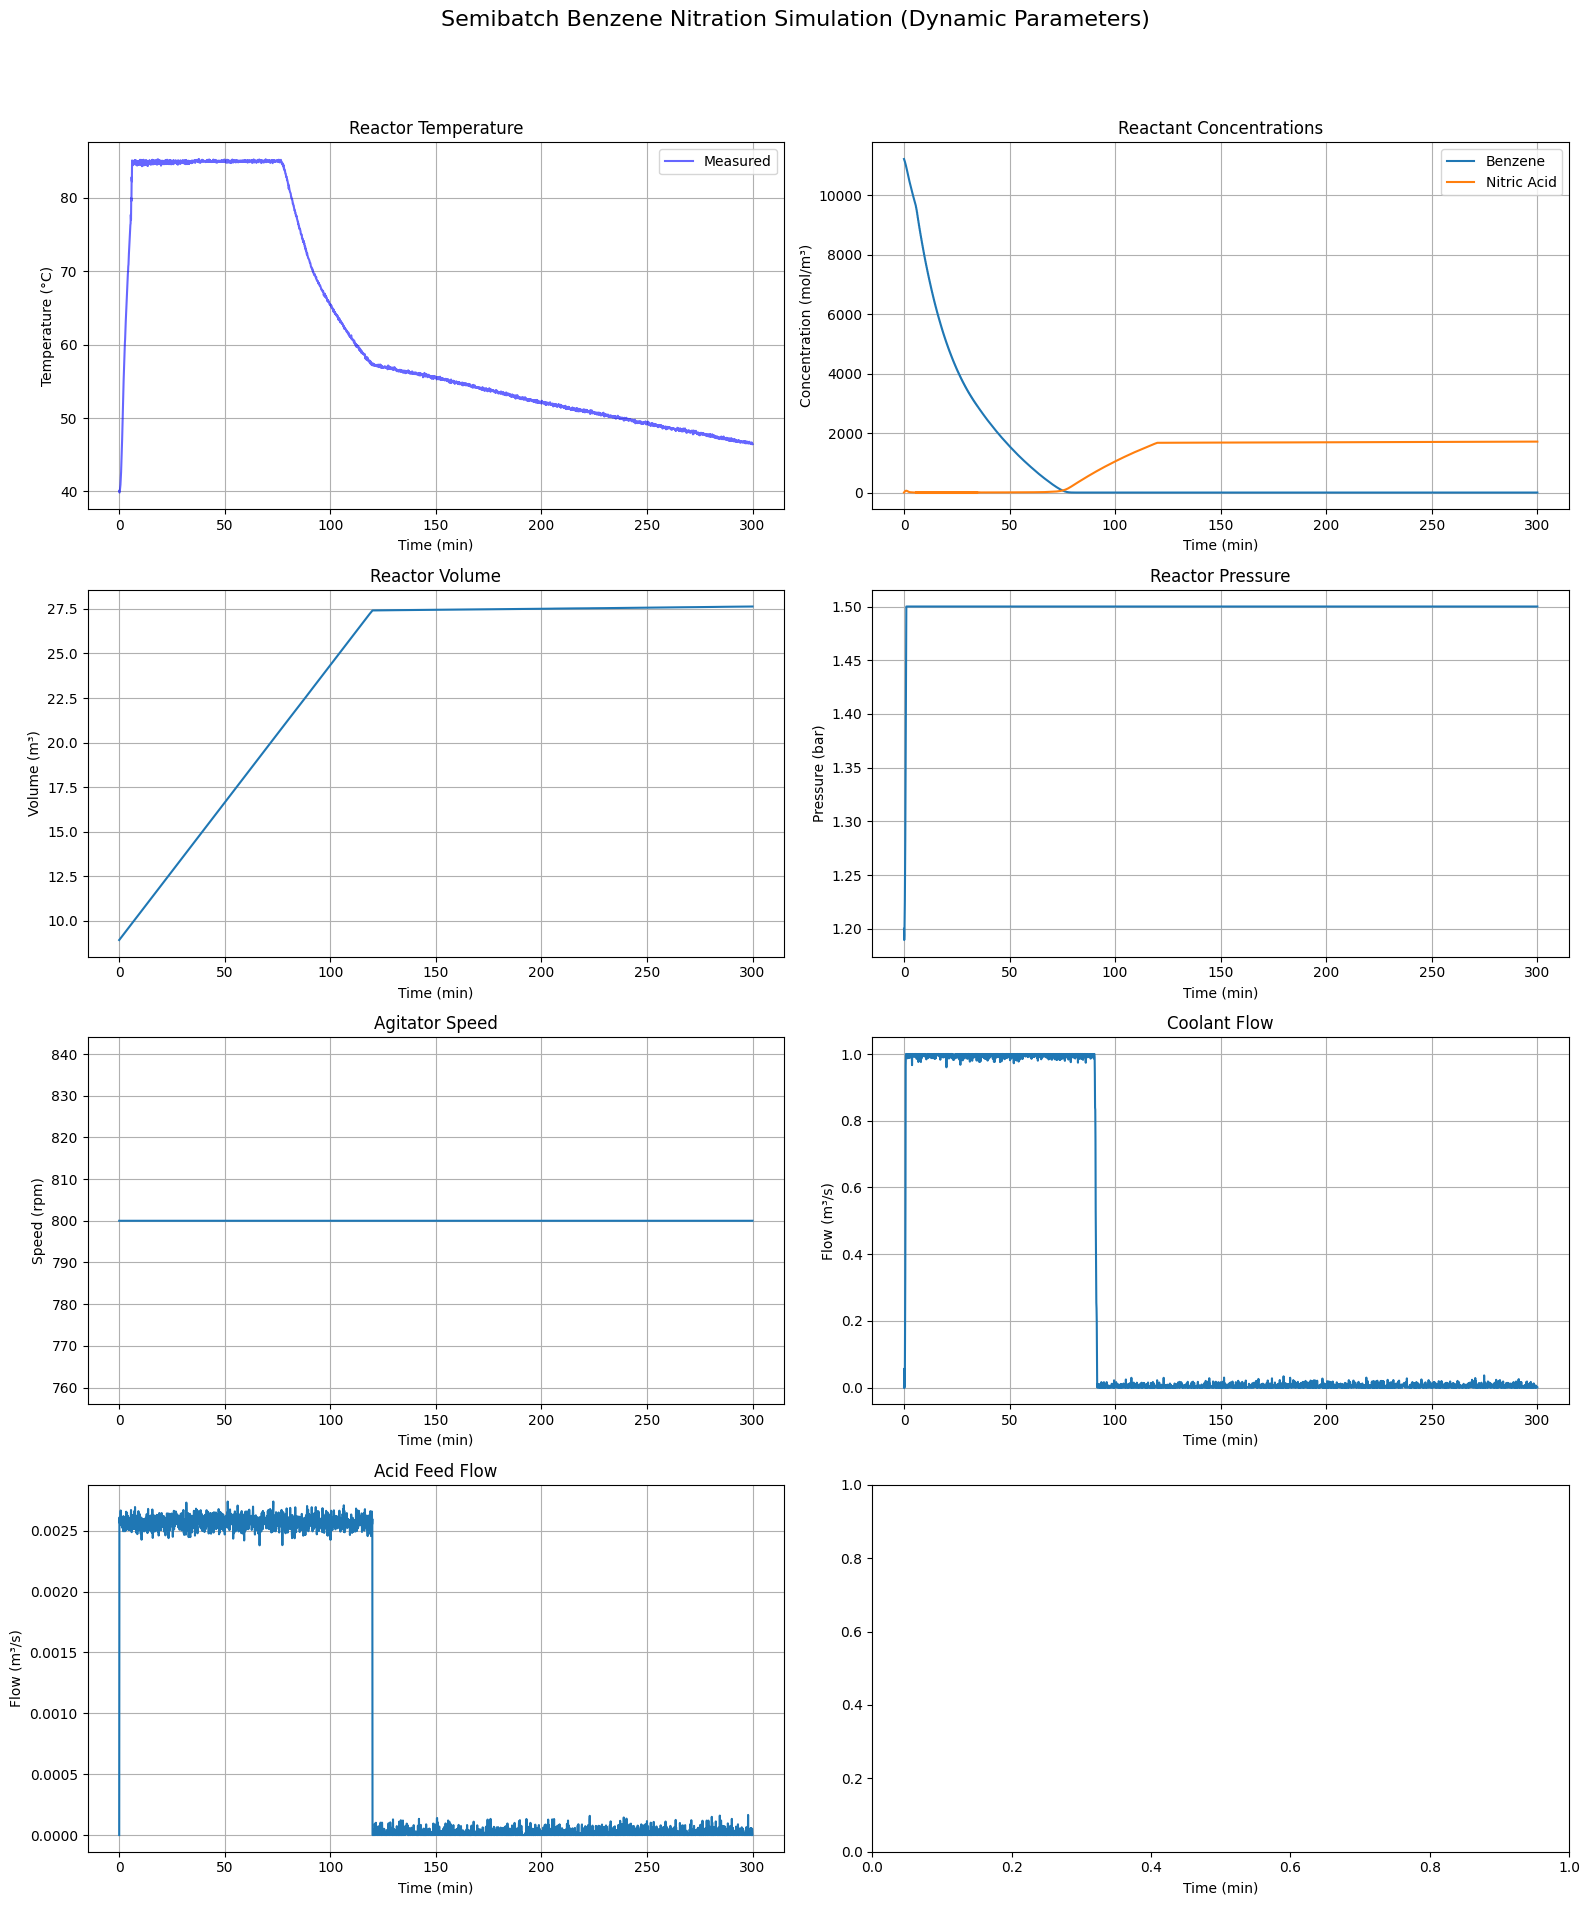

In [5]:
fig, axs = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Semibatch Benzene Nitration Simulation (Dynamic Parameters)', fontsize=16)

# Temperature Plo
axs[0, 0].plot(df['Time_min'], df['Temperature_Measured_K'] - 273.15, label='Measured', color='blue', alpha=0.6)
axs[0, 0].set_title('Reactor Temperature'); axs[0, 0].set_ylabel('Temperature (°C)'); axs[0, 0].legend(); axs[0, 0].grid(True)

# Concentration Plot
axs[0, 1].plot(df['Time_min'], df['Benzene_Concentration_mol_m3'], label='Benzene')
axs[0, 1].plot(df['Time_min'], df['NitricAcid_Concentration_mol_m3'], label='Nitric Acid')
axs[0, 1].set_title('Reactant Concentrations'); axs[0, 1].set_ylabel('Concentration (mol/m³)'); axs[0, 1].legend(); axs[0, 1].grid(True)

# Volume Plot
axs[1, 0].plot(df['Time_min'], df['Volume_m3'])
axs[1, 0].set_title('Reactor Volume'); axs[1, 0].set_ylabel('Volume (m³)'); axs[1, 0].grid(True)

# Pressure Plot
axs[1, 1].plot(df['Time_min'], df['Pressure_bar'])
axs[1, 1].set_title('Reactor Pressure'); axs[1, 1].set_ylabel('Pressure (bar)'); axs[1, 1].grid(True)

# Agitator Speed
axs[2, 0].plot(df['Time_min'], df['Agitator_Speed_rpm'])
axs[2, 0].set_title('Agitator Speed'); axs[2, 0].set_ylabel('Speed (rpm)'); axs[2, 0].grid(True)

# Coolant Flow
axs[2, 1].plot(df['Time_min'], df['Coolant_Flow_m3_s'])
axs[2, 1].set_title('Coolant Flow'); axs[2, 1].set_ylabel('Flow (m³/s)'); axs[2, 1].grid(True)

# Feed Flow
axs[3, 0].plot(df['Time_min'], df['Feed_Flow_m3_s'])
axs[3, 0].set_title('Acid Feed Flow'); axs[3, 0].set_ylabel('Flow (m³/s)'); axs[3, 0].grid(True)


for ax in axs.flat:
    ax.set_xlabel('Time (min)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()